In [3]:
import pandas as pd
import numpy as np

# Add rpy2 to run R code chunks
%load_ext rpy2.ipython

# Load metadata
data_path = "/Users/abry4213/data/Cogitate_MEG/"
metadata = pd.read_csv(f"{data_path}/all_participant_metadata_filtered.csv")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%%R 

# Load packages needed for visualization in R
suppressPackageStartupMessages({
    library(cowplot)
    library(ggpubr)
    library(glue)
    library(patchwork)
    library(see)
    library(tidyverse)

    # Set cowplot theme
    theme_set(theme_cowplot())
})

In [4]:
metadata.head()

,participant_id,sex,age,handedness,height,weight,primary_language,secondary_language,education,colorblind
0,sub-CA103,F,27,right,NaN,NaN,German,English,Graduate,False
1,sub-CA106,F,30,right,NaN,NaN,Greek,English,Graduate,False
2,sub-CA107,M,19,right,NaN,NaN,English,NaN,Undergraduate,False
3,sub-CA108,F,34,right,NaN,NaN,German,English,Graduate,False
4,sub-CA109,M,20,right,NaN,NaN,Spanish,English,Undergraduate,False


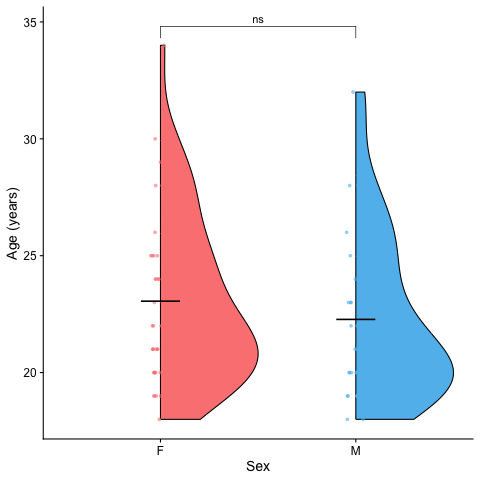

In [30]:
%%R -i metadata 

metadata %>% 
    ggplot(data=., mapping=aes(x=sex, y=age, fill=sex)) +
    geom_violinhalf(scale="width", color="black", position = position_dodge(width = 1), width=1)  +
    geom_point(aes(color = sex), position = position_jitter(width = 0.05, height=0),
                            size = 1.75, alpha=0.6, stroke=0) +
    stat_summary(color="black", fun="mean", geom="crossbar", width=0.2, linewidth=0.3, 
            show.legend=FALSE, position = position_dodge(width=1.4)) +
    ylab("Age (years)") +
    xlab("Sex") + 
    theme(legend.position="none") +
    scale_fill_manual(values=c("F"="#FB8483", "M" = "#60BDED")) +
    scale_color_manual(values=c("F"="#FB8483", "M" = "#60BDED")) +
    stat_compare_means(comparisons = list(c("F", "M")), method = "wilcox.test", label.y = 34, label='p.signif')
# ggsave("../plots/methods/age_vs_sex_distributions.svg", width=3, height=2.5, units="in", dpi=300)